In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
dir = "part_4/"
#to cite:
#(Milo et al, Science, 2002)

### The network:

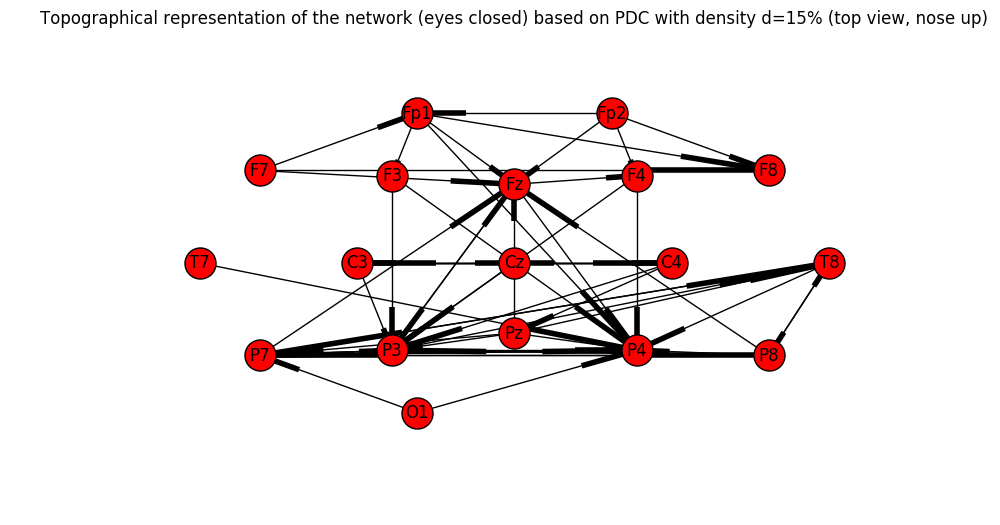

In [6]:
G_c = nx.read_weighted_edgelist("part_2/for_motifs_c.nx",nodetype=int, create_using=nx.DiGraph())
dfr_f1 = pd.read_csv("part_2/dfr_f1.csv")
locations = pd.read_csv("part_2/locations.csv")
locations = locations.set_index('label')
nodes = G_c.nodes()
labels = dict(zip(nodes, list(dfr_f1.columns)[1:]))
atr = dict() #locations
for node in nodes:
    atr[node] = (locations.loc[labels[node]][1],locations.loc[labels[node]][2])

plt.figure(figsize=(12,6))
plt.title("Topographical representation of the network (eyes closed) based on PDC with density d=15% (top view, nose up)")
nx.draw(G_c, node_size=500, pos = atr,labels=labels, with_labels=True)
plt.savefig("part_4/main_network_c", bbox_inches='tight')
plt.show()

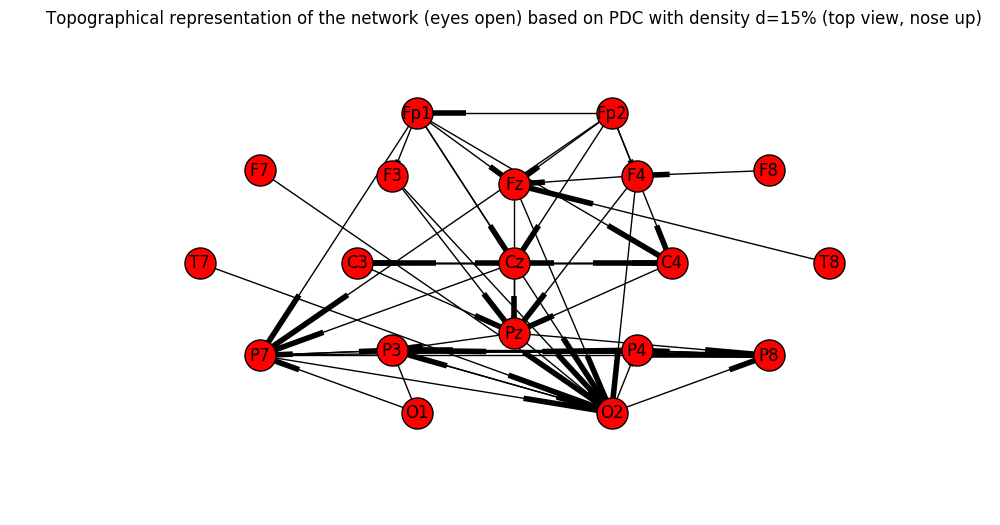

In [7]:
G_o = nx.read_weighted_edgelist("part_2/for_motifs_o.nx",nodetype=int, create_using=nx.DiGraph())
nodes = G_o.nodes()
labels = dict(zip(nodes, list(dfr_f1.columns)[1:]))
atr = dict() #locations
for node in nodes:
    atr[node] = (locations.loc[labels[node]][1],locations.loc[labels[node]][2])

plt.figure(figsize=(12,6))
plt.title("Topographical representation of the network (eyes open) based on PDC with density d=15% (top view, nose up)")
nx.draw(G_o, node_size=500, pos = atr,labels=labels, with_labels=True)
plt.savefig("part_4/main_network_o", bbox_inches='tight')
plt.show()

In [8]:
def mcounter_3(gr, mo):
    """Counts motifs in a directed graph
    :param gr: A ``DiGraph`` object
    :param mo: A ``dict`` of motifs to count
    :returns: A ``dict`` with the number of each motifs, with the same keys as ``mo``
    This function is actually rather simple. It will extract all 3-grams from
    the original graph, and look for isomorphisms in the motifs contained
    in a dictionary. The returned object is a ``dict`` with the number of
    times each motif was found.::
        >>> print mcounter(gr, mo)
        {'S1': 4, 'S3': 0, 'S2': 1, 'S5': 0, 'S4': 3}
    """
    #This function will take each possible subgraphs of gr of size 3, then
    #compare them to the mo dict using .subgraph() and is_isomorphic
    
    #This line simply creates a dictionary with 0 for all values, and the
    #motif names as keys

    mcount = dict(list(zip(list(mo.keys()), list(map(int, np.zeros(len(mo)))))))
    nodes = gr.nodes()

    #We use iterools.product to have all combinations of three nodes in the
    #original graph. Then we filter combinations with non-unique nodes, because
    #the motifs do not account for self-consumption.
    triplets = list(itertools.product(*[nodes, nodes, nodes]))
    triplets = [trip for trip in triplets if len(list(set(trip))) == 3]
    triplets = list(map(list, list(map(np.sort, triplets))))
    u_triplets = []
    [u_triplets.append(trip) for trip in triplets if not u_triplets.count(trip)]
    #print(str(len(u_triplets))+ "triplets found")
    #The for each each of the triplets, we (i) take its subgraph, and compare
    #it to all fo the possible motifs
    tr = 1
    for trip in u_triplets:
        sub_gr = gr.subgraph(trip)
        mot_match = [nx.is_isomorphic(sub_gr, mo[mot_id]) for mot_id in list(mo.keys())]
        match_keys = [list(mo.keys())[i] for i in range(len(mo)) if mot_match[i]]
        if len(match_keys) == 1:
            mcount[match_keys[0]] += 1
        tr = tr+1

    return mcount
def mcounter_4(gr, mo):
    """Counts motifs in a directed graph
    :param gr: A ``DiGraph`` object
    :param mo: A ``dict`` of motifs to count
    :returns: A ``dict`` with the number of each motifs, with the same keys as ``mo``
    This function is actually rather simple. It will extract all 3-grams from
    the original graph, and look for isomorphisms in the motifs contained
    in a dictionary. The returned object is a ``dict`` with the number of
    times each motif was found.::
        >>> print mcounter(gr, mo)
        {'S1': 4, 'S3': 0, 'S2': 1, 'S5': 0, 'S4': 3}
    """
    #This function will take each possible subgraphs of gr of size 3, then
    #compare them to the mo dict using .subgraph() and is_isomorphic
    
    #This line simply creates a dictionary with 0 for all values, and the
    #motif names as keys

    mcount = dict(list(zip(list(mo.keys()), list(map(int, np.zeros(len(mo)))))))
    nodes = gr.nodes()

    #We use iterools.product to have all combinations of three nodes in the
    #original graph. Then we filter combinations with non-unique nodes, because
    #the motifs do not account for self-consumption.
    triplets = list(itertools.product(*[nodes, nodes, nodes, nodes]))
    triplets = [trip for trip in triplets if len(list(set(trip))) == 4]
    triplets = list(map(list, list(map(np.sort, triplets))))
    u_triplets = []
    [u_triplets.append(trip) for trip in triplets if not u_triplets.count(trip)]
    #print(str(len(u_triplets))+ "triplets found")
    #The for each each of the triplets, we (i) take its subgraph, and compare
    #it to all fo the possible motifs
    tr = 1
    for trip in u_triplets:
        sub_gr = gr.subgraph(trip)
        mot_match = [nx.is_isomorphic(sub_gr, mo[mot_id]) for mot_id in list(mo.keys())]
        match_keys = [list(mo.keys())[i] for i in range(len(mo)) if mot_match[i]]
        if len(match_keys) == 1:
            mcount[match_keys[0]] += 1
        tr = tr+1

    return mcount

### all 3-nodes motifs

In [9]:
motifs = {
    'S1': nx.DiGraph([(2,1),(2,3)]),
    'S2': nx.DiGraph([(2,1),(3,2)]),
    'S3': nx.DiGraph([(2,1),(2,3),(3,2)]),
    'S4': nx.DiGraph([(2,1),(3,1)]),
    'S5': nx.DiGraph([(3,1),(2,1),(2,3)]),
    'S6': nx.DiGraph([(3,1),(2,1),(2,3),(3,2)]),
    'S7': nx.DiGraph([(1,2),(2,3),(3,2)]),
    'S8': nx.DiGraph([(1,2),(2,1),(2,3),(3,2)]),
    'S9': nx.DiGraph([(1,2),(2,3),(3,1)]),
    'S10': nx.DiGraph([(1,2),(2,1),(2,3),(3,1)]),
    'S11': nx.DiGraph([(1,2),(2,1),(3,2),(3,1)]),
    'S12': nx.DiGraph([(3,1),(1,2),(2,1),(2,3),(3,2)]),
    'S13': nx.DiGraph([(1,2),(2,1),(2,3),(3,2),(1,3),(3,1)])
    }

In [12]:
f_or_c3 = mcounter_3(G_c, motifs)
f_or_c3

{'S1': 9,
 'S10': 3,
 'S11': 6,
 'S12': 6,
 'S13': 2,
 'S2': 27,
 'S3': 5,
 'S4': 63,
 'S5': 19,
 'S6': 6,
 'S7': 21,
 'S8': 0,
 'S9': 0}

In [13]:
f_or_o3 = mcounter_3(G_o, motifs)
f_or_o3

{'S1': 19,
 'S10': 2,
 'S11': 7,
 'S12': 4,
 'S13': 1,
 'S2': 56,
 'S3': 2,
 'S4': 44,
 'S5': 18,
 'S6': 3,
 'S7': 17,
 'S8': 0,
 'S9': 0}

In [14]:
def random_net(A):
    M = np.zeros(A.shape)
    C = np.asarray(np.sum(A, axis = 0))
    C = list(C[0,:])
    R = np.asarray(np.sum(A, axis = 1))
    R = list(R[:,0])
    it = 0
    rows = np.arange(len(A))
    cols = np.arange(len(A))
    count = 0
    while (sum(C) + sum(R) !=0):
        p = [x/sum(R) for x in R]
        q = [x/sum(C) for x in C]
        n = int(np.random.choice(rows,size = 1, replace = False, p = p))
        m = int(np.random.choice(cols,size = 1, replace = False, p = q))
        if (M[n,m] == 0) or (m == n):
            M[n,m] = 1
            R[n]= R[n]-1
            C[m] = C[m]- 1
        else:
            count = count+1
        if count > 100:
            break
    return(nx.from_numpy_matrix(M, create_using=nx.DiGraph()))
        
        
        

In [15]:
N_sim = 100
def analyse(G,motifs,f_or,N_sim,size = 3):
    A = nx.adjacency_matrix(G)
    A= A.todense()
    res_over = dict()
    anti = dict()
    for i in range(N_sim):
        print(i)
        if size == 3:
            f_rand = mcounter_3(random_net(A), motifs)
        else:
            f_rand = mcounter_4(random_net(A), motifs)
        for key in f_or.keys():
            if res_over.get(key) == None:
                res_over[key]=[f_or[key]< f_rand[key]]
            else: 
                res_over[key].append(f_or[key]< f_rand[key])
            if anti.get(key) == None:
                anti[key]=[(f_rand[key]-f_or[key])>0.5*f_rand[key]]
            else: 
                anti[key].append((f_rand[key]-f_or[key])>0.5*f_rand[key])
    return(res_over,anti)


In [16]:
res_over_c3,anti_c3 = analyse(G_c,motifs,f_or_c3,100)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [18]:
print("Over-represented motifs for C with prob = 95%:")
for key in res_over_c3.keys():
    if sum(res_over_c3[key])/N_sim < 0.05:
        print(key,sum(res_over_c3[key])/N_sim)

Over-represented motifs for C with prob = 95%:
S7 0.03
S11 0.01
S4 0.04
S13 0.0
S6 0.0
S12 0.0


In [19]:
print("Anti-motifs for C:")
for key in anti_c3.keys():
    if sum(anti_c3[key])/N_sim >0.95:
        print(key,sum(anti_c3[key])/N_sim)

Anti-motifs for C:


In [20]:
res_over_o3,anti_o3 = analyse(G_o,motifs,f_or_o3,100)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [22]:
print("Over-represented motifs for O with prob = 95%:")
for key in res_over_o3.keys():
    if sum(res_over_o3[key])/N_sim < 0.05:
        print(key,sum(res_over_o3[key])/N_sim)

Over-represented motifs for O with prob = 95%:
S11 0.01
S13 0.0
S6 0.0
S12 0.0
S2 0.03
S5 0.04


In [21]:
print("Anti-motifs for O:")
for key in anti_o3.keys():
    if sum(anti_o3[key])/N_sim >0.95:
        print(key,sum(anti_o3[key])/N_sim)

Anti-motifs for O:


### 4.2. (class ‘C’) For the motif with pattern A → B ← C , create a topographical representation of
the   networks   considering   only   the   connections   involved   in   this   configuration.

In [23]:
def mcounter_nodes(gr, mo):
    """Counts motifs in a directed graph
    :param gr: A ``DiGraph`` object
    :param mo: A ``dict`` of motifs to count
    :returns: A ``dict`` with the number of each motifs, with the same keys as ``mo``
    This function is actually rather simple. It will extract all 3-grams from
    the original graph, and look for isomorphisms in the motifs contained
    in a dictionary. The returned object is a ``dict`` with the number of
    times each motif was found.::
        >>> print mcounter(gr, mo)
        {'S1': 4, 'S3': 0, 'S2': 1, 'S5': 0, 'S4': 3}
    """
    #This function will take each possible subgraphs of gr of size 3, then
    #compare them to the mo dict using .subgraph() and is_isomorphic
    
    #This line simply creates a dictionary with 0 for all values, and the
    #motif names as keys

    mcount = 0
    nodes = gr.nodes()

    #We use iterools.product to have all combinations of three nodes in the
    #original graph. Then we filter combinations with non-unique nodes, because
    #the motifs do not account for self-consumption.
    triplets = list(itertools.product(*[nodes, nodes, nodes]))
    triplets = [trip for trip in triplets if len(list(set(trip))) == 3]
    triplets = list(map(list, list(map(np.sort, triplets))))
    u_triplets = []
    [u_triplets.append(trip) for trip in triplets if not u_triplets.count(trip)]
    #print(str(len(u_triplets))+ "triplets found")
    #The for each each of the triplets, we (i) take its subgraph, and compare
    #it to all fo the possible motifs
    nodes = []
    for trip in u_triplets:
        sub_gr = gr.subgraph(trip)
        if nx.is_isomorphic(sub_gr, mo):
            mcount+= 1
            nodes.append(trip)

    return mcount,nodes

In [24]:
motif = {
    'S4': nx.DiGraph([(2,1),(3,1)]),
    }

In [25]:
motif["S4"]

In [26]:
_,nodes_o = mcounter_nodes(G_o, motif["S4"])


In [28]:
nodes_o=[val for sublist in nodes_o for val in sublist]

In [29]:
nodes_o=list(set(nodes_o))

In [30]:
sub_gr_o = G_o.subgraph(nodes_o)

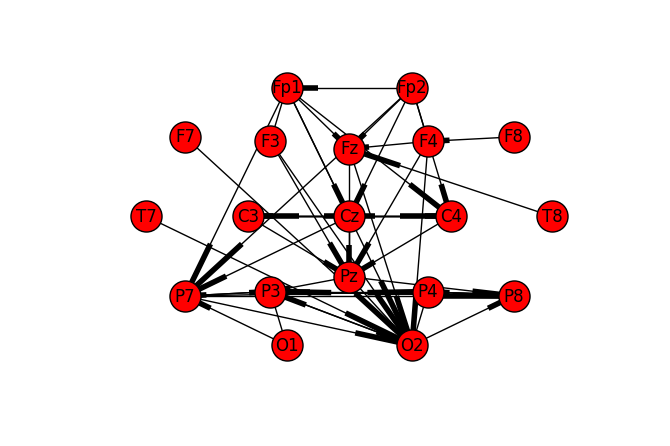

In [31]:
nx.draw(sub_gr_o,node_size=500, pos = atr,labels=labels, with_labels=True)
plt.savefig("part_4/single_motif_o", bbox_inches='tight')
plt.show()

In [32]:
nx.density(sub_gr_o)

0.15204678362573099

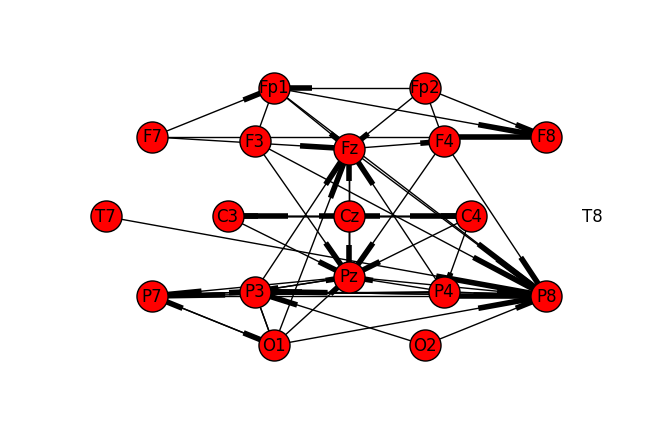

In [33]:
_,nodes_c = mcounter_nodes(G_c, motif["S4"])
nodes_c=[val for sublist in nodes_c for val in sublist]
nodes_c=list(set(nodes_c))
sub_gr_c = G_c.subgraph(nodes_c)
nx.draw(sub_gr_c,node_size=500, pos = atr,labels=labels, with_labels=True)
plt.savefig("part_4/single_motif_c", bbox_inches='tight')
plt.show()

In [614]:
### 4-nodes motifs

In [34]:
def all_motifs(source,size):
    #source - list of nodes
    #size - motif size
    pairings = [] #list of all possible links between nodes
    for  pair in itertools.product(source, repeat=2):
        if pair[0] != pair[1]:
            pairings.append(pair)
    print(str(len(pairings)) + " types of links found")
    start = size-1 #min num of edges in a single motif
    res = dict()
    comb = list(itertools.combinations(pairings, start)) #all combinations from pairings of size start
    g_id = 0  
    while len(comb) >0:
        for c in comb:
            if len(set(list(sum(list(c), ())))) == size: #we check if all motif nodes appear in the combination
                cand = nx.DiGraph(list(c)) #making a directed graph 
                add = True
                keys = res.keys()
                for j in keys:
                    if nx.is_isomorphic(res[j],cand):
                        add = False
                if add:
                    g_id = g_id+1
                    res["S"+str(g_id)] = cand
        start = start + 1
        comb = list(itertools.combinations(pairings, start))
    print(str(len(res))+ " motifs found")
    return(res)
    

In [35]:
d4 = all_motifs([1,2,3,4],4)

12 types of links found
201 motifs found


In [36]:
for key in d4.keys():
    print((key,d4[key].edges()))

('S66', [(1, 2), (1, 3), (2, 3), (3, 4), (4, 3)])
('S167', [(1, 2), (1, 3), (1, 4), (2, 1), (2, 3), (3, 1), (4, 2), (4, 3)])
('S129', [(1, 2), (1, 3), (1, 4), (2, 1), (2, 3), (3, 4), (4, 2)])
('S69', [(1, 2), (1, 3), (2, 4), (3, 4), (4, 2)])
('S179', [(1, 2), (1, 3), (2, 1), (2, 3), (3, 1), (3, 4), (4, 2), (4, 3)])
('S28', [(1, 2), (2, 1), (3, 1), (4, 2)])
('S177', [(1, 2), (1, 3), (2, 1), (2, 3), (3, 1), (3, 4), (4, 1), (4, 2)])
('S133', [(1, 2), (1, 3), (1, 4), (2, 1), (3, 1), (4, 2), (4, 3)])
('S164', [(1, 2), (1, 3), (1, 4), (2, 1), (2, 3), (3, 1), (3, 4), (4, 2)])
('S149', [(1, 2), (1, 3), (2, 1), (2, 4), (3, 1), (3, 4), (4, 1)])
('S127', [(1, 2), (1, 3), (1, 4), (2, 1), (2, 3), (3, 2), (4, 3)])
('S128', [(1, 2), (1, 3), (1, 4), (2, 1), (2, 3), (3, 4), (4, 1)])
('S138', [(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 2), (4, 3)])
('S87', [(1, 2), (1, 3), (2, 1), (2, 3), (3, 1), (3, 4)])
('S76', [(1, 2), (1, 3), (1, 4), (2, 1), (2, 3), (4, 3)])
('S7', [(1, 2), (2, 3), (4, 2)])
('S122'

In [37]:
keys = d4.keys()
s = 0 
for i in keys:
            for j in keys:
                if i != j:
                    s = s+nx.is_isomorphic(d4[i],d4[j])
s

0

In [38]:
f_or_o4 = mcounter_4(G_o, d4)
f_or_c4 = mcounter_4(G_c, d4)



In [39]:
res_over_c4,anti_c4 = analyse(G_c,d4,f_or_c4,40,size = 4)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


In [40]:
print("Over-represented motifs C with prob = 95%:")
over_c4 = []
N_sim = 40
for key in res_over_c4.keys():
    if (sum(res_over_c4[key])/N_sim) < 0.05 and f_or_c4[key]>0:
        over_c4.append(key)
        print(key,sum(res_over_c4[key])/N_sim)

Over-represented motifs C with prob = 95%:
S28 0.025
S138 0.0
S76 0.0
S197 0.0
S5 0.0
S141 0.0
S94 0.025
S155 0.0
S51 0.025
S119 0.0
S145 0.0
S195 0.0
S37 0.0
S88 0.0
S42 0.025
S158 0.0
S123 0.0
S186 0.0
S159 0.0
S9 0.025
S146 0.025
S140 0.0
S17 0.025
S41 0.0
S52 0.0
S30 0.0
S135 0.0
S182 0.0
S132 0.0
S175 0.0
S13 0.0
S43 0.0
S187 0.0
S90 0.0
S89 0.0
S62 0.0
S63 0.0
S67 0.025
S108 0.0
S185 0.0
S83 0.0
S176 0.0
S136 0.0
S59 0.0
S92 0.0


In [41]:
print("Anti-motifs:")
for key in anti_c4.keys():
    if sum(anti_c4[key])/N_sim >0.9:
        print(key,sum(anti_c4[key])/N_sim)

Anti-motifs:


In [104]:
result_over_c4 = {}
for key in over_c4:
    result_over_c4[key] = [f_or_c4[key],d4[key].edges()]
#labels = ["Motif ID", "Frequency C", "Pattern C"]
#df_c4 = pd.DataFrame.from_records(result_over_c4, columns=labels)
#df_c4 =df_c4.set_index(["Motif ID"])
#pd.set_option('display.max_colwidth', -1)
result_over_c4

{'S108': [3, [(1, 2), (1, 3), (2, 1), (3, 2), (4, 1), (4, 2)]],
 'S119': [1, [(1, 2), (1, 3), (1, 4), (2, 1), (2, 3), (3, 1), (3, 2)]],
 'S123': [1, [(1, 2), (1, 3), (1, 4), (2, 1), (2, 3), (3, 1), (4, 3)]],
 'S13': [10, [(1, 2), (1, 3), (2, 1), (3, 4)]],
 'S132': [2, [(1, 2), (1, 3), (1, 4), (2, 1), (2, 3), (4, 2), (4, 3)]],
 'S135': [1, [(1, 2), (1, 3), (1, 4), (2, 1), (3, 2), (3, 4), (4, 3)]],
 'S136': [2, [(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 2), (3, 4)]],
 'S138': [1, [(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 2), (4, 3)]],
 'S140': [1, [(1, 2), (1, 3), (2, 1), (2, 3), (3, 1), (3, 2), (4, 1)]],
 'S141': [1, [(1, 2), (1, 3), (2, 1), (2, 3), (3, 1), (3, 4), (4, 1)]],
 'S145': [5, [(1, 2), (1, 3), (2, 1), (2, 3), (3, 1), (4, 1), (4, 3)]],
 'S146': [2, [(1, 2), (1, 3), (2, 1), (2, 3), (3, 1), (4, 2), (4, 3)]],
 'S155': [1, [(1, 2), (1, 3), (1, 4), (2, 1), (2, 3), (2, 4), (3, 1), (3, 2)]],
 'S158': [1, [(1, 2), (1, 3), (1, 4), (2, 1), (2, 3), (2, 4), (3, 1), (4, 2)]],
 'S159':

In [46]:
res_over_o4,anti_o4 = analyse(G_o,d4,f_or_o4,40,size = 4)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


In [47]:
res_over_o4

{'S1': [False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False],
 'S10': [True,
  True,
  False,
  True,
  True,
  True,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  True,
  True,
  False,
  False,
  False,
  False,
  True,
  False,
  False,
  True,
  False,
  False,
  True,
  False,
  True,
  False,
  False,
  False,
  False,
  True,
  False,
  True,
  False,
  False],
 'S100': [False,
  True,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  True,
  False,
  False,
  True,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  F

In [107]:
print("Over-represented motifs O with prob = 95%:")
over_o4 = []
N_sim = 40
for key in res_over_o4.keys():
    if (sum(res_over_o4[key])/N_sim) < 0.05 and f_or_o4[key]>0:
        over_o4.append(key)
        print(key,sum(res_over_o4[key])/N_sim)

Over-represented motifs O with prob = 95%:
S66 0.0
S7 0.0
S21 0.0
S5 0.0
S139 0.0
S119 0.0
S40 0.0
S145 0.0
S114 0.0
S37 0.025
S193 0.0
S6 0.025
S20 0.0
S146 0.0
S19 0.0
S41 0.0
S144 0.025
S30 0.0
S38 0.0
S182 0.0
S1 0.0
S93 0.0
S175 0.0
S13 0.0
S11 0.0
S43 0.0
S2 0.025
S50 0.025
S24 0.0
S169 0.0
S90 0.0
S89 0.0
S62 0.0
S67 0.025
S22 0.0
S84 0.0
S185 0.0
S83 0.0
S33 0.025
S176 0.0
S18 0.0
S59 0.0
S8 0.0


In [131]:
len(over_o4)

43

In [113]:
result_over_o4 = dict()
for key in over_o4:
    result_over_o4[key]=[f_or_o4[key],d4[key].edges()]
#labels = ["Motif ID", "Frequency O", "Pattern O"]
#df_o4 = pd.DataFrame.from_records(result_over_o4, columns=labels)
#df_o4 =df_o4.set_index(["Motif ID"])
#pd.set_option('display.max_colwidth', -1)

In [114]:
result_over_o4

{'S1': [7, [(1, 2), (1, 3), (1, 4)]],
 'S11': [15, [(1, 2), (1, 3), (1, 4), (2, 3)]],
 'S114': [4, [(1, 2), (1, 3), (2, 3), (2, 4), (3, 4), (4, 3)]],
 'S119': [1, [(1, 2), (1, 3), (1, 4), (2, 1), (2, 3), (3, 1), (3, 2)]],
 'S13': [6, [(1, 2), (1, 3), (2, 1), (3, 4)]],
 'S139': [2, [(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4), (4, 3)]],
 'S144': [2, [(1, 2), (1, 3), (2, 1), (2, 3), (3, 1), (4, 1), (4, 2)]],
 'S145': [3, [(1, 2), (1, 3), (2, 1), (2, 3), (3, 1), (4, 1), (4, 3)]],
 'S146': [1, [(1, 2), (1, 3), (2, 1), (2, 3), (3, 1), (4, 2), (4, 3)]],
 'S169': [1, [(1, 2), (1, 3), (1, 4), (2, 1), (2, 3), (3, 2), (3, 4), (4, 2)]],
 'S175': [1, [(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 2), (3, 4), (4, 2)]],
 'S176': [2, [(1, 2), (1, 3), (2, 1), (2, 3), (3, 1), (3, 2), (4, 1), (4, 2)]],
 'S18': [21, [(1, 2), (1, 3), (2, 3), (3, 4)]],
 'S182': [1,
  [(1, 2), (1, 3), (1, 4), (2, 1), (2, 3), (2, 4), (3, 1), (3, 2), (3, 4)]],
 'S185': [1,
  [(1, 2), (1, 3), (1, 4), (2, 1), (2, 3), (2, 4), (

In [115]:
result = dict()
for key in result_over_o4.keys():
    result[key] = result_over_o4[key]
    if result_over_c4.get(key) == None:
        result[key].append("not over-repr.")
    else:
        result[key].append(result_over_c4[key][0])
result

{'S1': [7, [(1, 2), (1, 3), (1, 4)], 'not over-repr.'],
 'S11': [15, [(1, 2), (1, 3), (1, 4), (2, 3)], 'not over-repr.'],
 'S114': [4,
  [(1, 2), (1, 3), (2, 3), (2, 4), (3, 4), (4, 3)],
  'not over-repr.'],
 'S119': [1, [(1, 2), (1, 3), (1, 4), (2, 1), (2, 3), (3, 1), (3, 2)], 1],
 'S13': [6, [(1, 2), (1, 3), (2, 1), (3, 4)], 10],
 'S139': [2,
  [(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4), (4, 3)],
  'not over-repr.'],
 'S144': [2,
  [(1, 2), (1, 3), (2, 1), (2, 3), (3, 1), (4, 1), (4, 2)],
  'not over-repr.'],
 'S145': [3, [(1, 2), (1, 3), (2, 1), (2, 3), (3, 1), (4, 1), (4, 3)], 5],
 'S146': [1, [(1, 2), (1, 3), (2, 1), (2, 3), (3, 1), (4, 2), (4, 3)], 2],
 'S169': [1,
  [(1, 2), (1, 3), (1, 4), (2, 1), (2, 3), (3, 2), (3, 4), (4, 2)],
  'not over-repr.'],
 'S175': [1,
  [(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 2), (3, 4), (4, 2)],
  4],
 'S176': [2,
  [(1, 2), (1, 3), (2, 1), (2, 3), (3, 1), (3, 2), (4, 1), (4, 2)],
  1],
 'S18': [21, [(1, 2), (1, 3), (2, 3), (3, 4)], 'not 

In [116]:
for key in result_over_c4.keys():
    if result.get(key) == None:
        result[key] = ["not over-repr."]
        result[key].append(result_over_c4[key][1])
        result[key].append(result_over_c4[key][0])
result

{'S1': [7, [(1, 2), (1, 3), (1, 4)], 'not over-repr.'],
 'S108': ['not over-repr.',
  [(1, 2), (1, 3), (2, 1), (3, 2), (4, 1), (4, 2)],
  3],
 'S11': [15, [(1, 2), (1, 3), (1, 4), (2, 3)], 'not over-repr.'],
 'S114': [4,
  [(1, 2), (1, 3), (2, 3), (2, 4), (3, 4), (4, 3)],
  'not over-repr.'],
 'S119': [1, [(1, 2), (1, 3), (1, 4), (2, 1), (2, 3), (3, 1), (3, 2)], 1],
 'S123': ['not over-repr.',
  [(1, 2), (1, 3), (1, 4), (2, 1), (2, 3), (3, 1), (4, 3)],
  1],
 'S13': [6, [(1, 2), (1, 3), (2, 1), (3, 4)], 10],
 'S132': ['not over-repr.',
  [(1, 2), (1, 3), (1, 4), (2, 1), (2, 3), (4, 2), (4, 3)],
  2],
 'S135': ['not over-repr.',
  [(1, 2), (1, 3), (1, 4), (2, 1), (3, 2), (3, 4), (4, 3)],
  1],
 'S136': ['not over-repr.',
  [(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 2), (3, 4)],
  2],
 'S138': ['not over-repr.',
  [(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 2), (4, 3)],
  1],
 'S139': [2,
  [(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4), (4, 3)],
  'not over-repr.'],
 'S140': ['not o

In [117]:
result['S37']

[4, [(1, 2), (1, 3), (1, 4), (2, 3), (2, 4)], 2]

In [120]:
labels = ["Motif ID", "Frequency O", "Pattern","Frequency C"]
df= pd.DataFrame.from_dict(result,orient='index')
#df_o4 =df_o4.set_index(["Motif ID"])
#pd.set_option('display.max_colwidth', -1)
df

,0,1,2
S66,8,"[(1, 2), (1, 3), (2, 3), (3, 4), (4, 3)]",not over-repr.
S88,not over-repr.,"[(1, 2), (1, 3), (2, 1), (2, 3), (3, 1), (4, 1)]",6
S11,15,"[(1, 2), (1, 3), (1, 4), (2, 3)]",not over-repr.
S42,not over-repr.,"[(1, 2), (1, 3), (2, 1), (2, 3), (4, 1)]",6
S28,not over-repr.,"[(1, 2), (2, 1), (3, 1), (4, 2)]",16
S132,not over-repr.,"[(1, 2), (1, 3), (1, 4), (2, 1), (2, 3), (4, 2), (4, 3)]",2
S114,4,"[(1, 2), (1, 3), (2, 3), (2, 4), (3, 4), (4, 3)]",not over-repr.
S195,not over-repr.,"[(1, 2), (1, 3), (1, 4), (2, 1), (2, 3), (2, 4), (3, 1), (3, 2), (3, 4), (4, 1)]",1
S62,19,"[(1, 2), (1, 3), (2, 3), (3, 2), (4, 1)]",2
S17,not over-repr.,"[(1, 2), (1, 3), (2, 3), (2, 4)]",6


In [122]:
df.columns = ["Freq. O","Pattern", "Freq Q"]

In [124]:
df =df[["Pattern","Freq. O","Freq Q"]]

In [127]:
df.to_csv("over.csv")

In [128]:
df

,Pattern,Freq. O,Freq Q
S66,"[(1, 2), (1, 3), (2, 3), (3, 4), (4, 3)]",8,not over-repr.
S88,"[(1, 2), (1, 3), (2, 1), (2, 3), (3, 1), (4, 1)]",not over-repr.,6
S11,"[(1, 2), (1, 3), (1, 4), (2, 3)]",15,not over-repr.
S42,"[(1, 2), (1, 3), (2, 1), (2, 3), (4, 1)]",not over-repr.,6
S28,"[(1, 2), (2, 1), (3, 1), (4, 2)]",not over-repr.,16
S132,"[(1, 2), (1, 3), (1, 4), (2, 1), (2, 3), (4, 2), (4, 3)]",not over-repr.,2
S114,"[(1, 2), (1, 3), (2, 3), (2, 4), (3, 4), (4, 3)]",4,not over-repr.
S195,"[(1, 2), (1, 3), (1, 4), (2, 1), (2, 3), (2, 4), (3, 1), (3, 2), (3, 4), (4, 1)]",not over-repr.,1
S62,"[(1, 2), (1, 3), (2, 3), (3, 2), (4, 1)]",19,2
S17,"[(1, 2), (1, 3), (2, 3), (2, 4)]",not over-repr.,6
